1      00:05.92      00:05.92
2      00:09.39      00:03.47
3      00:13.09      00:03.70
4      00:16.21      00:03.12
5      00:20.67      00:04.46
6      00:24.99      00:04.32
7      00:28.48      00:03.49
8      00:33.79      00:05.31
9      00:37.93      00:04.14
10      00:44.67      00:06.74
11      00:49.13      00:04.46
12      00:55.76      00:06.63
13      01:03.23      00:07.47
14      01:10.62      00:07.39
15      01:18.95      00:08.33
16      01:27.79      00:08.84
17      01:37.35      00:09.56
18      01:48.68      00:11.33
19      02:00.83      00:12.15
20      02:37.08      00:36.25
21      03:05.90      00:28.82
22      03:37.98      00:32.08
23      04:44.84      01:06.86

In [91]:
import numpy as np

In [92]:
def seconds(time_str):

    minutes, seconds_ms = time_str.split(':')
    seconds, milliseconds = seconds_ms.split('.')

    minutes = int(minutes)
    seconds = int(seconds)
    milliseconds = int(milliseconds)

    total_seconds = minutes * 60 + seconds + milliseconds / 100

    return total_seconds

def mid_point(arr):
    arr=np.array(arr)
    midpoints = (arr[:-1] + arr[1:]) / 2
    return midpoints

In [93]:


# Create an array
a = dict['2.5-2']

# Calculate midpoints

print(np.array(a[:-1])+np.array(a[1:]))


[ 15.31  22.48  29.3   36.88  45.66  53.47  62.27  71.72  82.6   93.8
 104.89 118.99 133.85 149.57 166.74 185.14 206.03 229.51 277.91 342.98
 403.88 502.82]


In [101]:
file_path = '/home/master/Desktop/PHYS442-experiments/Radioactive-Decay/data.txt' 
dict={}
keys=[]
count=0
append=False
with open(file_path, 'r') as file:
    for line in file:
        line=line.strip()
        if line=="start":
            append=True
        if not append:
            dict[line]=[]
            keys.append(line)
            count+=1   
        if append:
            columns = line.split()
            if len(columns) > 1: 
                dict[keys[count-1]].append(seconds(columns[1]))
        if line=="end":
            append=False           
print(dict)
print(keys)

{'2.5-2': [5.92, 9.39, 13.09, 16.21, 20.67, 24.99, 28.48, 33.79, 37.93, 44.67, 49.13, 55.76, 63.23, 70.62, 78.95, 87.79, 97.35, 108.68, 120.83, 157.08, 185.9, 217.98, 284.84], '2.5-3': [2.51, 8.65, 10.74, 14.2, 17.32, 20.48, 24.26, 27.6, 31.6, 35.31, 39.47, 44.19, 48.55, 53.23, 58.94, 64.62, 70.9, 77.55, 84.92, 93.03, 101.97, 112.03, 123.01, 136.01, 151.83, 171.84, 195.67, 229.82, 288.47], '2.5-4': [4.8100000000000005, 8.52, 10.39, 13.61, 17.01, 19.64, 23.36, 27.26, 31.13, 35.11, 38.95, 43.54, 48.19, 53.14, 58.41, 64.03, 69.75, 75.84, 83.34, 91.26, 99.87, 109.27, 120.87, 130.21, 144.79, 164.2, 186.58, 216.94, 273.65], '2.5-5': [1.06, 3.42, 5.92, 8.35, 11.11, 13.59, 16.78, 19.6, 22.85, 25.84, 29.2, 32.55, 35.72, 39.59, 44.18, 47.97, 52.29, 56.96, 61.8, 67.26, 73.04, 79.67, 86.4, 92.7, 100.69, 110.89, 118.87, 130.14, 145.41, 160.99, 177.84, 199.56, 230.27, 286.81, 370.16], '3.0-2': [5.28, 7.84, 12.43, 15.33, 20.12, 24.23, 28.0, 33.42, 38.82, 44.85, 49.7, 56.81, 64.15, 71.45, 80.26, 90.22

In [102]:
si={}
ti={}
for i in keys:
    si[i]=np.diff(dict[i])
    ti[i]=mid_point(dict[i])

In [103]:
dict

{'2.5-2': [5.92,
  9.39,
  13.09,
  16.21,
  20.67,
  24.99,
  28.48,
  33.79,
  37.93,
  44.67,
  49.13,
  55.76,
  63.23,
  70.62,
  78.95,
  87.79,
  97.35,
  108.68,
  120.83,
  157.08,
  185.9,
  217.98,
  284.84],
 '2.5-3': [2.51,
  8.65,
  10.74,
  14.2,
  17.32,
  20.48,
  24.26,
  27.6,
  31.6,
  35.31,
  39.47,
  44.19,
  48.55,
  53.23,
  58.94,
  64.62,
  70.9,
  77.55,
  84.92,
  93.03,
  101.97,
  112.03,
  123.01,
  136.01,
  151.83,
  171.84,
  195.67,
  229.82,
  288.47],
 '2.5-4': [4.8100000000000005,
  8.52,
  10.39,
  13.61,
  17.01,
  19.64,
  23.36,
  27.26,
  31.13,
  35.11,
  38.95,
  43.54,
  48.19,
  53.14,
  58.41,
  64.03,
  69.75,
  75.84,
  83.34,
  91.26,
  99.87,
  109.27,
  120.87,
  130.21,
  144.79,
  164.2,
  186.58,
  216.94,
  273.65],
 '2.5-5': [1.06,
  3.42,
  5.92,
  8.35,
  11.11,
  13.59,
  16.78,
  19.6,
  22.85,
  25.84,
  29.2,
  32.55,
  35.72,
  39.59,
  44.18,
  47.97,
  52.29,
  56.96,
  61.8,
  67.26,
  73.04,
  79.67,
  86.4,
  92.7,


In [104]:
ti

{'2.5-2': array([  7.655,  11.24 ,  14.65 ,  18.44 ,  22.83 ,  26.735,  31.135,
         35.86 ,  41.3  ,  46.9  ,  52.445,  59.495,  66.925,  74.785,
         83.37 ,  92.57 , 103.015, 114.755, 138.955, 171.49 , 201.94 ,
        251.41 ]),
 '2.5-3': array([  5.58 ,   9.695,  12.47 ,  15.76 ,  18.9  ,  22.37 ,  25.93 ,
         29.6  ,  33.455,  37.39 ,  41.83 ,  46.37 ,  50.89 ,  56.085,
         61.78 ,  67.76 ,  74.225,  81.235,  88.975,  97.5  , 107.   ,
        117.52 , 129.51 , 143.92 , 161.835, 183.755, 212.745, 259.145]),
 '2.5-4': array([  6.665,   9.455,  12.   ,  15.31 ,  18.325,  21.5  ,  25.31 ,
         29.195,  33.12 ,  37.03 ,  41.245,  45.865,  50.665,  55.775,
         61.22 ,  66.89 ,  72.795,  79.59 ,  87.3  ,  95.565, 104.57 ,
        115.07 , 125.54 , 137.5  , 154.495, 175.39 , 201.76 , 245.295]),
 '2.5-5': array([  2.24 ,   4.67 ,   7.135,   9.73 ,  12.35 ,  15.185,  18.19 ,
         21.225,  24.345,  27.52 ,  30.875,  34.135,  37.655,  41.885,
         46.075,  

In [ ]:
si

{'2.5-2': array([ 3.47,  3.7 ,  3.12,  4.46,  4.32,  3.49,  5.31,  4.14,  6.74,
         4.46,  6.63,  7.47,  7.39,  8.33,  8.84,  9.56, 11.33, 12.15,
        36.25, 28.82, 32.08, 66.86]),
 '2.5-3': array([ 6.14,  2.09,  3.46,  3.12,  3.16,  3.78,  3.34,  4.  ,  3.71,
         4.16,  4.72,  4.36,  4.68,  5.71,  5.68,  6.28,  6.65,  7.37,
         8.11,  8.94, 10.06, 10.98, 13.  , 15.82, 20.01, 23.83, 34.15,
        58.65]),
 '2.5-4': array([ 3.71,  1.87,  3.22,  3.4 ,  2.63,  3.72,  3.9 ,  3.87,  3.98,
         3.84,  4.59,  4.65,  4.95,  5.27,  5.62,  5.72,  6.09,  7.5 ,
         7.92,  8.61,  9.4 , 11.6 ,  9.34, 14.58, 19.41, 22.38, 30.36,
        56.71]),
 '2.5-5': array([ 2.36,  2.5 ,  2.43,  2.76,  2.48,  3.19,  2.82,  3.25,  2.99,
         3.36,  3.35,  3.17,  3.87,  4.59,  3.79,  4.32,  4.67,  4.84,
         5.46,  5.78,  6.63,  6.73,  6.3 ,  7.99, 10.2 ,  7.98, 11.27,
        15.27, 15.58, 16.85, 21.72, 30.71, 56.54, 83.35]),
 '3.0-2': array([ 2.56,  4.59,  2.9 ,  4.79,  4.11, 

In [122]:
x=ti[keys[7]]
y=[1/j for j in si[keys[7]]]

In [119]:
x

array([  4.58 ,   7.875,  13.61 ,  18.885,  23.15 ,  27.56 ,  31.935,
        36.495,  41.435,  47.68 ,  56.75 ,  65.41 ,  72.23 ,  80.315,
        88.845,  99.75 , 111.035, 123.69 , 139.21 , 158.035, 181.825,
       215.065, 270.615])

In [120]:
y

[np.float64(0.6097560975609754),
 np.float64(0.20202020202020204),
 np.float64(0.15337423312883433),
 np.float64(0.24813895781637732),
 np.float64(0.2222222222222222),
 np.float64(0.23148148148148145),
 np.float64(0.22573363431151244),
 np.float64(0.2132196162046906),
 np.float64(0.19267822736030837),
 np.float64(0.13698630136986306),
 np.float64(0.09225092250922506),
 np.float64(0.1543209876543209),
 np.float64(0.13966480446927382),
 np.float64(0.11098779134295239),
 np.float64(0.12422360248447187),
 np.float64(0.07267441860465121),
 np.float64(0.11350737797956864),
 np.float64(0.06060606060606061),
 np.float64(0.06877579092159564),
 np.float64(0.043271311120726935),
 np.float64(0.040866366979975484),
 np.float64(0.023803856224708406),
 np.float64(0.01447387465624547)]

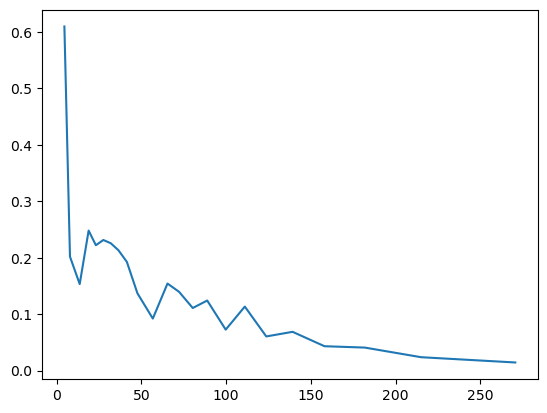

In [121]:
import matplotlib.pyplot as plt
plt.plot(x,y)